In [1]:
# Randomization effects

# Random assignment plays a critical role in A/B testing. Imagine you are a Data Scientist setting up an experiment to test the effects of different checkout page designs on business metrics.

# You will explore sampling a percentage of users to simulate random enrollment of traffic into the experiment and check the distributions of certain attributes across randomly assigned users in each group. This allows you to verify the ability to generalize to the general traffic population, and isolate the impact of the one variable we are changing across groups: the check out page design.

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, chisquare
from statsmodels.stats import power
from statsmodels.stats.proportion import proportion_effectsize, proportions_ztest, proportion_confint
# !pip install pingouin
import pingouin as pg

In [3]:
checkout = pd.read_csv('checkout.csv')
checkout

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696
...,...,...,...,...,...,...,...,...
8995,8995,903591,C,45.395883,1.0,M,safari,63.291767
8996,8996,883490,C,30.462670,1.0,F,safari,33.425340
8997,8997,914494,C,34.037979,1.0,M,chrome,40.575958
8998,8998,897280,C,28.937421,1.0,F,chrome,30.374843


In [4]:
# Determine the normalized distribution of browser counts
checkout['browser'].value_counts(normalize = True)

browser
safari     0.343333
chrome     0.331444
firefox    0.325222
Name: proportion, dtype: float64

In [5]:
# Draw a random sample of rows
sample_df = checkout.sample(n = 2000)

sample_df

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
7913,7913,855372,C,33.361225,1.0,F,safari,39.222451
4346,4346,890623,B,33.603184,1.0,M,safari,47.804245
492,492,895888,A,27.750711,1.0,F,chrome,58.203412
3164,3164,855895,B,20.809234,1.0,F,chrome,30.745645
7331,7331,879040,C,31.127705,1.0,M,safari,34.755410
...,...,...,...,...,...,...,...,...
4566,4566,899424,B,29.661650,1.0,F,chrome,42.548867
7143,7143,865840,C,29.144198,1.0,F,firefox,30.788395
7475,7475,883882,C,33.376349,1.0,F,chrome,39.252697
5388,5388,892177,B,28.078255,1.0,M,chrome,40.437673


In [6]:
# Check the counts distribution of sampled users' browsers
sample_df['browser'].value_counts(normalize = True)


browser
safari     0.3535
firefox    0.3400
chrome     0.3065
Name: proportion, dtype: float64

In [7]:
# Check the counts distribution of browsers across checkout pages
checkout.groupby('checkout_page')['browser'].value_counts(normalize = True)

checkout_page  browser
A              chrome     0.341333
               safari     0.332000
               firefox    0.326667
B              safari     0.352000
               firefox    0.325000
               chrome     0.323000
C              safari     0.346000
               chrome     0.330000
               firefox    0.324000
Name: proportion, dtype: float64

In [8]:
# Correlation visualization

# Though correlations do not imply causation, they quantify the strength and direction to which two variables are associated. This is especially useful in situations where A/B tests are not feasible due to lack of resources or limited data/user-base.

# The admissions dataset is loaded for you and includes various information like GRE score, TOEFL score, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, and chance of admission. You will examine the relationship between some of these attributes and how the chances of admission changes with changes in these variables.

In [9]:
admissions = pd.read_csv('admissions.csv')
admissions

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

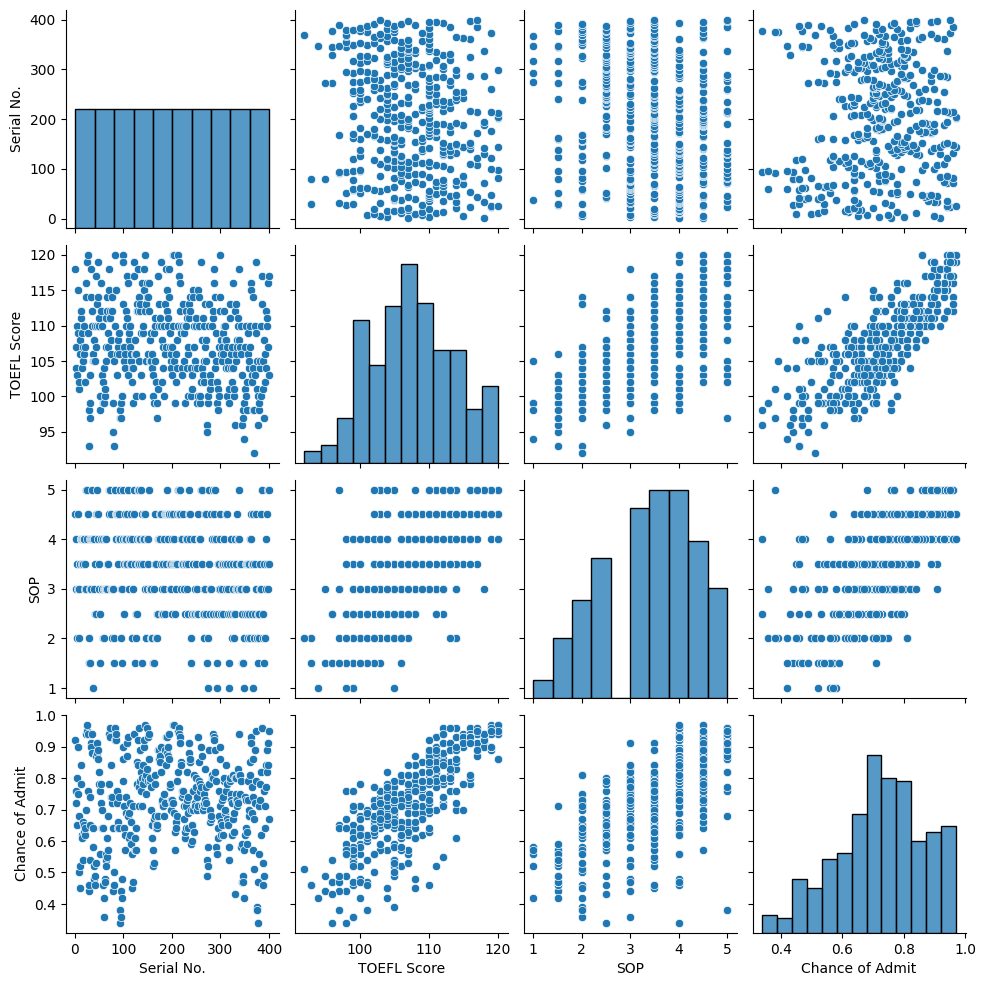

In [10]:
# Visualize the variables in a pairplot
sns.pairplot(admissions[['Serial No.', 'TOEFL Score', 'SOP', 'Chance of Admit']])
plt.show()

In [11]:
# Print Pearson's correlation coefficients
print(admissions[['Serial No.', 'TOEFL Score', 'SOP','Chance of Admit']].corr())

                 Serial No.  TOEFL Score       SOP  Chance of Admit
Serial No.         1.000000    -0.147932 -0.166932         0.042336
TOEFL Score       -0.147932     1.000000  0.657981         0.791594
SOP               -0.166932     0.657981  1.000000         0.675732
Chance of Admit    0.042336     0.791594  0.675732         1.000000


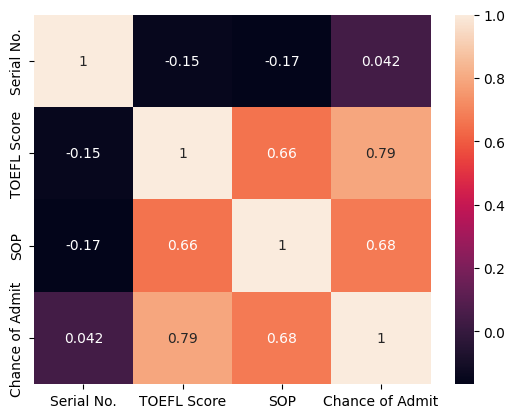

In [12]:
# Visualize the coefficients in a heatmap
sns.heatmap(admissions[['Serial No.', 'TOEFL Score', 'SOP','Chance of Admit']].corr(), annot = True)
plt.show()

In [13]:
# Means and proportions

# Mean and proportion estimates usually serve as great primary metrics when aligned with the business goals.

# The checkout DataFrame is loaded for you, where every row corresponds to a unique user visiting the respective checkout_page along with their actions and additional attributes. A '1' value in the purchased column corresponds to a user purchasing an item, and a '0' means they have abandoned the page without purchasing. You will examine the data and calculate both mean and proportions as an exploratory step towards evaluating which design performs best.

In [14]:
# Calculate the mean order value for each group
checkout.groupby('checkout_page')['order_value'].mean()

checkout_page
A    24.956437
B    29.876202
C    34.917589
Name: order_value, dtype: float64

In [15]:
# Calculate the proportion of users who purchased for each page
checkout.groupby('checkout_page')['purchased'].mean()

checkout_page
A    0.820333
B    0.847000
C    0.867667
Name: purchased, dtype: float64

In [16]:
# Calculate the proportion of users who purchased and the mean order value
checkout.groupby('checkout_page')[['order_value', 'purchased']].mean()

,order_value,purchased
checkout_page,,
A,24.956437,0.820333
B,29.876202,0.847000
C,34.917589,0.867667


In [17]:
# Ad impressions metrics

# An advertising company has developed a new ad to increase users' engagement with their questionnaire. The new ad was shown to a percentage of users in the exposed group and a dummy ad was shown to the control. Consider yourself the Data Analyst responsible for interpreting the results of the test. The first step you decide to take is to define and estimate useful metrics to begin evaluating the success of the marketing initiative.

In [18]:
AdSmart = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')
AdSmart

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [19]:
# Filter on users who responded 
AdSmart_Responded = AdSmart[(AdSmart['yes'] == 1) | (AdSmart['no'] == 1)]
AdSmart_Responded = AdSmart_Responded[(AdSmart_Responded['date'] > '2020-07-05')]
AdSmart_Responded

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
80,02a9eba3-58b0-4759-b3ae-68a19cb2b59e,exposed,2020-07-09,20,Moto $2,6,Chrome Mobile WebView,0,1
...,...,...,...,...,...,...,...,...,...
8042,fee7da61-84fe-451b-95f4-ba2523fa987d,exposed,2020-07-09,14,Generic Smartphone,6,Chrome Mobile,1,0
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,0
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1


In [20]:
# Find the counts of yes after 2020-07-05 per experiment
AdSmart_Responded.groupby('experiment')['yes'].sum()

experiment
control    113
exposed    184
Name: yes, dtype: int64

In [21]:
# Proportion of users who responded 'yes' by experiment type
AdSmart_Responded.groupby('experiment')['yes'].sum() / AdSmart_Responded.shape[0]

experiment
control    0.176012
exposed    0.286604
Name: yes, dtype: float64

In [22]:
# Proportion of users who responded 'yes' by experiment type and platform OS
AdSmart_Responded.groupby(['experiment','platform_os'])['yes'].sum() / AdSmart_Responded.shape[0]

experiment  platform_os
control     5              0.003115
            6              0.172897
exposed     5              0.000000
            6              0.286604
Name: yes, dtype: float64

In [23]:
# Plotting distributions

# Understanding how both discrete (e.g. binomial) and continuous (e.g. normal) probability distributions play a role in A/B testing enables us to gain additional visual insights into the nature of the data and deeper conceptual understanding of the theories that power the statistical frameworks of online experimentation.

# Of great importance are two distributions: the binomial and the normal distributions. Follow the instructions to create plots and explore their parameters.

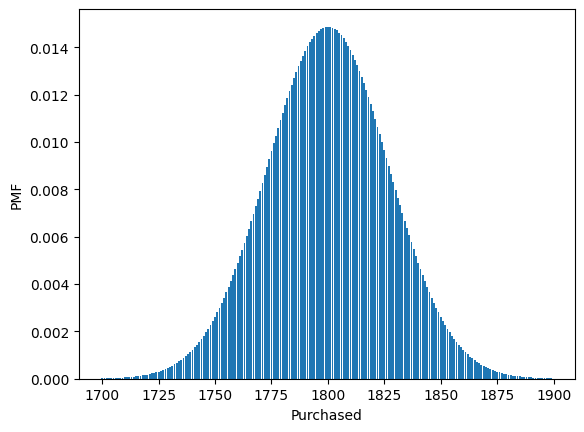

In [24]:
# Plot a binomial distribution

p = 0.6 # probability
n = 3000 # trials

x = np.arange(n*p - 100, n*p + 100) 
binom_a = binom.pmf(x, n, p)

plt.bar(x, binom_a)
plt.xlabel('Purchased')
plt.ylabel('PMF')
plt.show()

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


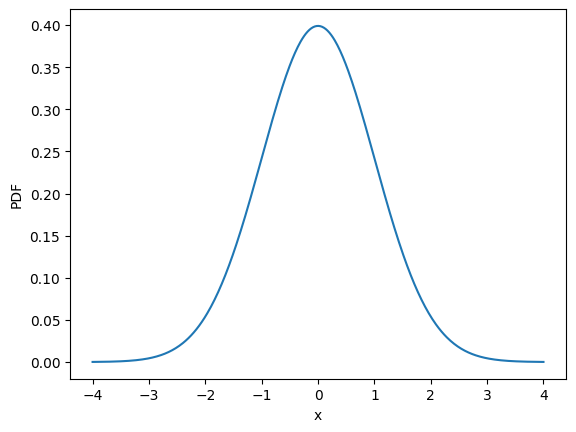

In [25]:
# Plot a normal distribution

mean = 0
sd = 1

x = np.linspace(-4, 4, 500)
norm_a = norm.pdf(x, mean, sd)

sns.lineplot(x=x, y=norm_a)
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

In [26]:
# Central limit theorem for means

# Regardless of the distribution of the data, the central limit theorem (CLT), among other benefits, allows us to assume normality of the sampling distributions of metrics that we often examine in A/B testing such as means, sums, proportions, standard deviations, and percentiles. Statistical significance tests that assume normality can therefore be easily applied to such scenarios in order to make solid conclusions about our experiments.

# The goal of this exercise is to demonstrate how the CLT applies to various distributions and appreciate its power.

In [27]:
checkout

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696
...,...,...,...,...,...,...,...,...
8995,8995,903591,C,45.395883,1.0,M,safari,63.291767
8996,8996,883490,C,30.462670,1.0,F,safari,33.425340
8997,8997,914494,C,34.037979,1.0,M,chrome,40.575958
8998,8998,897280,C,28.937421,1.0,F,chrome,30.374843


In [28]:
checkout[checkout.checkout_page=='A'].order_value

0       29.410131
1             NaN
2       27.446845
3       30.602233
4       29.668895
          ...    
2995          NaN
2996    22.731335
2997    24.518989
2998    21.968711
2999          NaN
Name: order_value, Length: 3000, dtype: float64

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


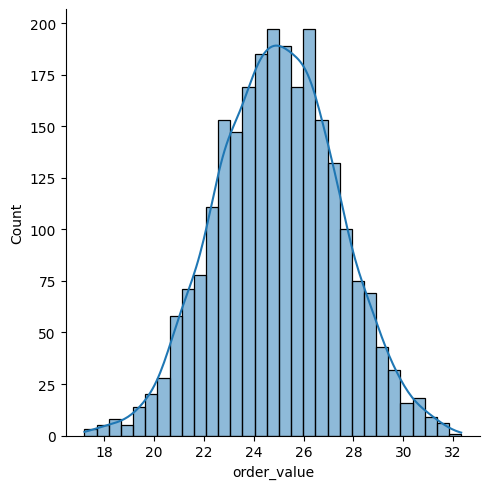

In [29]:
sns.displot(checkout[checkout.checkout_page=='A'].order_value, kde=True)

In [30]:
np.random.seed(47)

# Create an empty list, then a for loop for 1000 samples of size 5
sampled_means = []
for i in range(1000):
    sample = checkout[checkout['checkout_page']=='A']['order_value'].sample(5, replace=True)

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


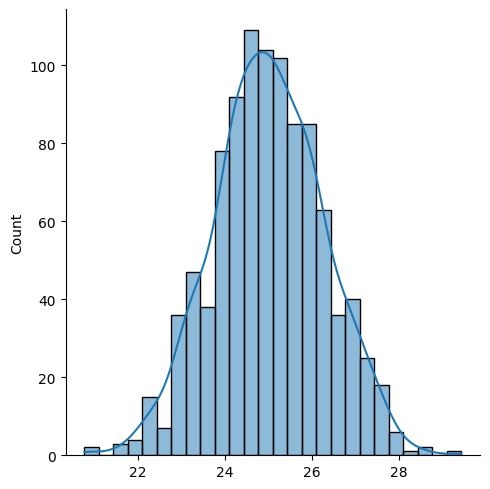

In [31]:
np.random.seed(47)

# Create an empty list, then a for loop for 1000 samples of size 5
sampled_means = []

for i in range(1000):
    sample = checkout[checkout['checkout_page']=='A']['order_value'].sample(5, replace=True)
    # Get the sample mean and append to list
    sample_mean = np.mean(sample)
    sampled_means.append(sample_mean)
    
# Plot distribution
# Note how even for a small sample size of five, the sampling distribution of the means still resembles a normal one since the underlying data is already normally distributed.
sns.displot(sampled_means, kde=True)
plt.show()

In [32]:
# Plotting power curves

# Performing a power analysis prior to running an A/B test is one of the most important steps. It enables us to improve our chances of reaching conclusive results and better plan for resources and time allocated to each test. Moreover, plotting power curves makes it easier to visualize the impact of varying certain parameters on the required sample size to hit the desired levels of confidence. Although a larger sample size betters our chances of reaching a conclusive result, gathering additional units or spending more time is a waste of resources as the power curves saturate.

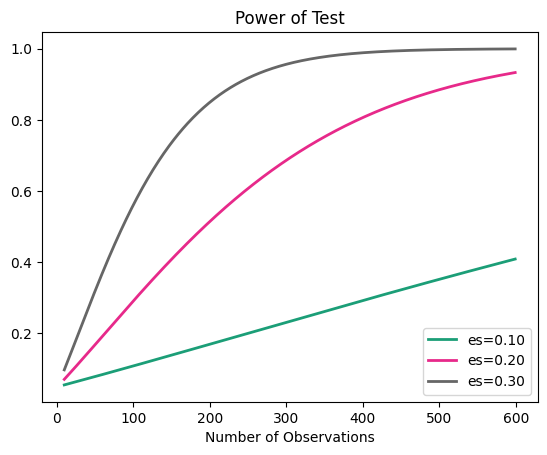

In [33]:
from statsmodels.stats.power import TTestIndPower

# Specify parameters for power analysis
sample_sizes = np.array(range(10, 600))
effect_sizes = np.array([0.1, 0.2, 0.3])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

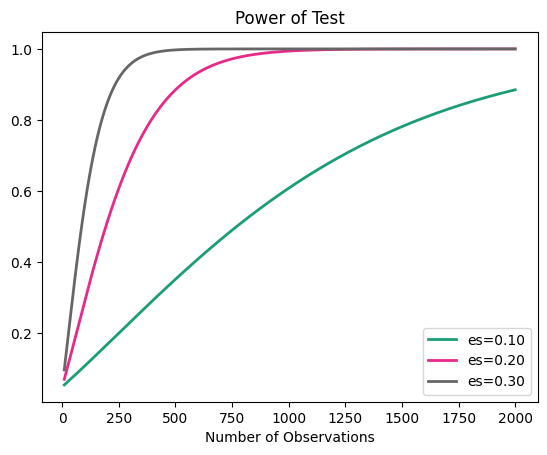

In [34]:
from statsmodels.stats.power import TTestIndPower

# Adjust the parameters for power analysis
sample_sizes = np.array(range(10,2000))
effect_sizes = np.array([0.1, 0.2, 0.3])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [35]:
# Sample size for means

# When designing an A/B test, you as a Data Scientist are responsible for checking if a test is feasible in the first place. This entails answering several questions such as: do we have enough traffic? How do we quantify "enough"? What is the minimum difference we can detect given the sample size we have? How long does an experiment need to run? And more.

# In this exercise, you will calculate the minimum sample size required to capture a statistically significant difference of a certain value between the baseline mean order_value for the control group, and a new design to be tested

In [36]:
# Calculate and print the baseline mean and standard deviation
mean_B = checkout[checkout['checkout_page']=='B']['order_value'].mean()
print(mean_B)

std_B = checkout[checkout['checkout_page']=='B']['order_value'].std()
print(std_B)

# Define mean_new and calculate the standardized effect size
mean_new = 31


29.876202331571395
7.277644184694845


In [37]:
std_effect_size=(mean_new-mean_B)/std_B
print(std_effect_size)


0.15441778134633083


In [38]:
# Calculate the required sample size
sample_size = power.TTestIndPower().solve_power(effect_size=std_effect_size, power=0.8, alpha=0.05, nobs1=None)

print(sample_size)

659.2892380942867


In [39]:
# Sample size for proportions

# Real datasets can be messy. As an Analytics Engineer working with data in the real world, you will encounter situations where the variance in the data is too high to be able to capture a meaningful difference in the metrics. This problem is more likely to happen with continuous metrics such as the average order value in the previous exercise. There are several ways to tackle this, but one of the workarounds is finding a metric that has lower variance but still aligns with the business goals.

# Here you will look at calculating the sample size for a binary metric; signup rate which represents whether a user signed up for the service or not, as opposed to the paid price which may vary more between users.

In [40]:
# CREATE DATAFRAME

# Set the seed for reproducibility
np.random.seed(0)

# Number of rows in the DataFrame
n = 10800

# Create the 'Unnamed: 0' column
unnamed_0 = np.arange(n)

# Create the 'user_id' column
user_id = np.random.randint(1104, 591183, size=n)

# Create the 'landing_page' column
landing_page = np.random.choice(['A', 'B', 'C', 'D'], size=n, p=[2700/n, 1-2700/n, 0, 0])

# Create the 'signup' column
signup = np.random.choice([0, 1], size=n, p=[1-0.054, 0.054])

# Create the 'time_on_page' column
time_on_page = np.random.normal(26.737, 6.892, size=n)
time_on_page = np.clip(time_on_page, 1.565, 51.868)  # Ensure values are within the min and max

# Create the DataFrame
homepage = pd.DataFrame({
    'Unnamed: 0': unnamed_0,
    'user_id': user_id,
    'landing_page': landing_page,
    'signup': signup,
    'time_on_page': time_on_page
})

# Display the DataFrame
print(homepage)


       Unnamed: 0  user_id landing_page  signup  time_on_page
0               0   306815            B       0     28.566135
1               1   436933            A       0     26.405884
2               2   119056            B       0     22.497566
3               3   153419            A       0     30.418353
4               4   360887            B       0     31.392795
...           ...      ...          ...     ...           ...
10795       10795   586091            B       0     38.157340
10796       10796   519591            B       1     33.790593
10797       10797   534253            B       0     20.385600
10798       10798    17109            B       0     27.650946
10799       10799   496160            A       0     25.532436

[10800 rows x 5 columns]


In [41]:
# Calculate the baseline signup rate for group A
p_A=homepage[homepage['landing_page']=='A']['signup'].mean()
print('Group A mean signup rate:',p_A)

# Define p_new and calculate standardized effect size
p_new = 0.07

effect_size_std = proportion_effectsize(p_new, p_A)
print(effect_size_std)

# Calculate the required sample size per group
sample_size = power.TTestIndPower().solve_power(effect_size=effect_size_std, power=0.8, alpha=0.05, nobs1=None)

print(round(sample_size, 1)) # sample size needed to test the 'effect_size_std'

Group A mean signup rate: 0.05878084179970972
0.04575078128033033
7500.6


In [42]:
# Corrected p-values

# Imagine you are a Data Scientist working for a subscription company. The web design team is working on finding the perfect CTA (call-to-action) button to urge page visitors to sign up for their service. They presented you with 4 different designs besides the current version.

# After running an experiment comparing each variant to the control, you generated a list of p-values loaded in the pvals variable. Comparing them directly to the significance threshold would result in an inflated Type I error rate. To avoid this, you can use the smt.multipletests() function from Python's statsmodels library to correct the p-values and test for statistical significance with a FWER = 5%.

In [43]:
import statsmodels.stats.multitest as smt

pvals = [0.0126, 0.0005, 0.00007, 0.009]

# Perform a Bonferroni correction and print the output
corrected = smt.multipletests(pvals, alpha = 0.05, method = 'bonferroni')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Bonferroni Corrected alpha: {:.4f}'.format(corrected[3]))

Significant Test: [False  True  True  True]
Corrected P-values: [0.0504  0.002   0.00028 0.036  ]
Bonferroni Corrected alpha: 0.0125


In [44]:
import statsmodels.stats.multitest as smt

pvals=[0.0126, 0.0005, 0.00007, 0.009]

# Perform a Sidak correction and print the output
corrected = smt.multipletests(pvals, alpha = 0.05, method = 'sidak')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Sidak Corrected alpha: {:.4f}'.format(corrected[3]))

Significant Test: [ True  True  True  True]
Corrected P-values: [0.04945542 0.0019985  0.00027997 0.03551691]
Sidak Corrected alpha: 0.0125


In [45]:
# Proportions EDA

# Exploratory data analysis (EDA) allows us to get an initial understanding of the data. Summary statistics explain the magnitude, direction, and spread of our average metrics, and visual distributions and trends provide deeper insights into understanding what to look for and uncovering interesting patterns that can be masked under the average summary statistics.

In [46]:
checkout

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696
...,...,...,...,...,...,...,...,...
8995,8995,903591,C,45.395883,1.0,M,safari,63.291767
8996,8996,883490,C,30.462670,1.0,F,safari,33.425340
8997,8997,914494,C,34.037979,1.0,M,chrome,40.575958
8998,8998,897280,C,28.937421,1.0,F,chrome,30.374843


In [47]:
# Calculate the mean, standard deviation and count
checkout.groupby('checkout_page')['purchased'].agg({'mean','std','count'})


,mean,std,count
checkout_page,,,
A,0.820333,0.383974,3000
B,0.847000,0.360048,3000
C,0.867667,0.338909,3000


Text(0, 0.5, 'Purchase Rate')

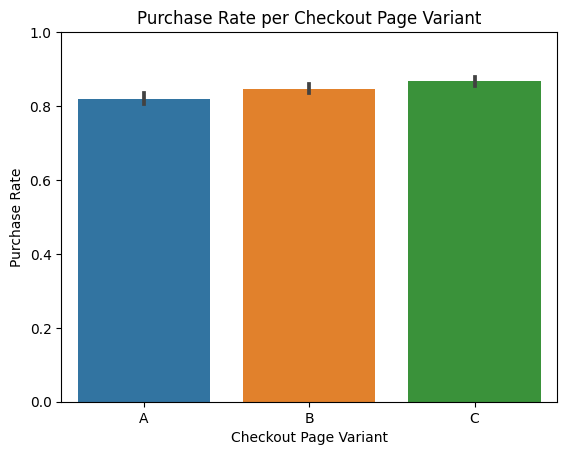

In [48]:
# Create a bar plot of average purchase rate per checkout page
sns.barplot(x=checkout['checkout_page'], y=checkout['purchased'], estimator=np.mean)
plt.ylim(0, 1)
plt.title('Purchase Rate per Checkout Page Variant')
plt.xlabel('Checkout Page Variant')
plt.ylabel('Purchase Rate')


In [49]:
AdSmart

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


C:\Users\Alienware\AppData\Local\Temp\ipykernel_29324\460997983.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=AdSmart, x='date', y='no', hue='experiment', ci=False)
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

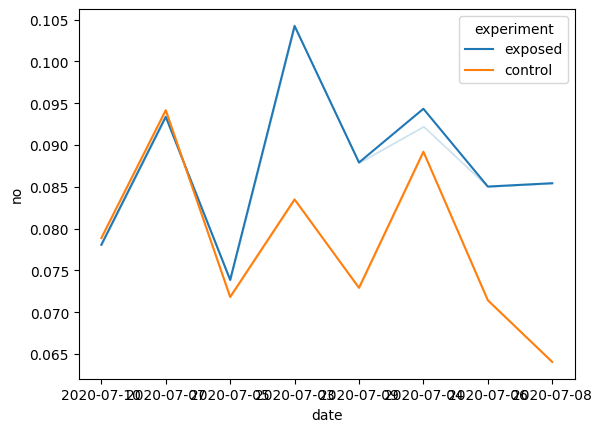

In [50]:
# Plot the proportion of 'no' responses over experiment duration
sns.lineplot(data=AdSmart, x='date', y='no', hue='experiment', ci=False)
plt.show()

In [51]:
# A/B test data cleaning

# A/B testing data cleaning is no different from the usual process taught in data cleaning and manipulation courses. However, understanding the context and data logging behavior of each A/B test on a case-by-case basis enables you to make decisions about how to handle messy data. Dropping or keeping duplicates or missing values are two cases where we need to be careful with our metric definitions and how consistent these are across variants.

In [52]:
# Check for duplicate rows due to logging issues 

print(len(AdSmart))
print(len(AdSmart.drop_duplicates(keep='first')))


8077
8077


In [53]:
homepage

,Unnamed: 0,user_id,landing_page,signup,time_on_page
0,0,306815,B,0,28.566135
1,1,436933,A,0,26.405884
2,2,119056,B,0,22.497566
3,3,153419,A,0,30.418353
4,4,360887,B,0,31.392795
...,...,...,...,...,...
10795,10795,586091,B,0,38.157340
10796,10796,519591,B,1,33.790593
10797,10797,534253,B,0,20.385600
10798,10798,17109,B,0,27.650946


In [54]:
# Calculate the unique users in group B 
print(homepage[homepage['landing_page'] == 'B']['user_id'].nunique())


7999


In [55]:
# unique users who signed up at least one time
print(homepage[homepage['landing_page'] == 'B'].groupby('user_id')['signup'].max().sum())


425


In [56]:
# all signups in the group B
print(homepage[homepage['landing_page'] == 'B']['signup'].sum())

425


In [57]:
# SRM

# When we design an experiment to allocate enrollment units (e.g. users) at a given percentage per variant, we expect some slight variations to happen due to logging issues, delays, minor instrumentation bugs, etc. When that deviation is larger than what is expected, however, this is usually an indication of a larger issue that could invalidate and bias our test results. The goal of this exercise is to examine the statistical techniques that enable you to catch cases where the allocation mismatch is too large to be blamed on chance alone.

# As an analytics engineer, your role may require you to design and even automate frameworks for catching sample ratio mismatches in A/B tests.

In [58]:
# Assign the unqiue counts to each variant
control_users = checkout[checkout['checkout_page'] == 'A']['user_id'].nunique()
treatment_users = checkout[checkout['checkout_page'] == 'B']['user_id'].nunique()
total_users = control_users + treatment_users
print("Control unique users:",control_users)
print("Control unique users:",treatment_users)


Control unique users: 2940
Control unique users: 2938


In [59]:
# Calculate the percentages and create two lists
control_perc = control_users / total_users
treatment_perc = treatment_users / total_users
print("Percentage of users in the Control group:",100*round(control_perc,5),"%")
print("Percentage of users in the Exposed group:",100*round(treatment_perc,5),"%")


Percentage of users in the Control group: 50.017 %
Percentage of users in the Exposed group: 49.983 %


In [60]:
observed = [ control_users, treatment_users ]
expected = [ total_users/2, total_users/2 ]

# Run chisquare test on observed and expected lists and print the results
chi = chisquare(observed, f_exp=expected)

print(chi)
if chi[1] < 0.01:
    print("SRM may be present")
else:
    print("SRM likely not present")

Power_divergenceResult(statistic=0.0006805035726437564, pvalue=0.9791883740327534)
SRM likely not present


In [61]:
# Distributions balance

# Another way we can quickly check for randomization bias in our A/B tests is by looking at how balanced or imbalanced the distributions of metrics and attributes that shouldn't change between the different variants. Any major differences in the percentage of certain devices, browsers, or operating systems for examples, assuming our samples are large enough, could be symptoms of larger problems in our internal setup. Examine the AdSmart and checkout datasets that are loaded for you and check for internal validity using the attributes distributions. Which dataset seems to have a more valid internal setup?

In [62]:
AdSmart.groupby('experiment')['platform_os'].value_counts(normalize=True)

experiment  platform_os
control     6              0.924343
            5              0.075657
exposed     6              0.969795
            5              0.029955
            7              0.000250
Name: proportion, dtype: float64

In [63]:
# Check the distribution of gender by checkout_page
checkout.groupby('checkout_page')['gender'].value_counts(normalize=True)

checkout_page  gender
A              M         0.505000
               F         0.495000
B              F         0.507333
               M         0.492667
C              F         0.520333
               M         0.479667
Name: proportion, dtype: float64

In [64]:
# Novelty effects detection

# Novelty effects happen more often than most Data Scientists and Engineers would expect. Running an A/B test on one new cool feature and calling the decision after seeing a big uptick in usage metrics over the first few days is one of the common mistakes that junior analysts fall into.

In [65]:
data = {
    'date': pd.date_range(start='2023-01-01', periods=14),
    'CTR_lift': [0.060, 0.055, 0.050, 0.035, 0.040, 0.035, 0.037, 0.035, 0.034, 0.035, 0.036, 0.035, 0.035, 0.035],
    'ToP_lift': [15.0, 14.0, 11.0, 7.0, 8.0, 7.0, 9.0, 7.0, 8.5, 7.0, 7.8, 7.0, 7.0, 7.0],
    'purchase_rate': [0.030, 0.020, 0.022, 0.020, 0.020, 0.026, 0.031, 0.029, 0.020, 0.020, 0.023, 0.020, 0.030, 0.032],
    'CTR': [0.052, 0.050, 0.052, 0.050, 0.050, 0.051, 0.053, 0.052, 0.050, 0.050, 0.051, 0.050, 0.052, 0.050]
}

novelty = pd.DataFrame(data)

novelty

,date,CTR_lift,ToP_lift,purchase_rate,CTR
0,2023-01-01,0.060,15.0,0.030,0.052
1,2023-01-02,0.055,14.0,0.020,0.050
2,2023-01-03,0.050,11.0,0.022,0.052
3,2023-01-04,0.035,7.0,0.020,0.050
4,2023-01-05,0.040,8.0,0.020,0.050
5,2023-01-06,0.035,7.0,0.026,0.051
6,2023-01-07,0.037,9.0,0.031,0.053
7,2023-01-08,0.035,7.0,0.029,0.052
8,2023-01-09,0.034,8.5,0.020,0.050
9,2023-01-10,0.035,7.0,0.020,0.050


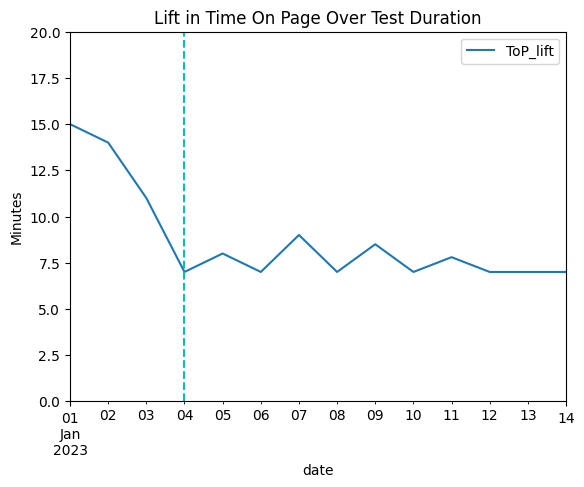

In [66]:
# Plot ToP_lift over the test dates
novelty.plot('date', 'ToP_lift')
# Add a vertical dashed line
plt.axvline(x='2023-01-04',color='c',linestyle='dashed')
plt.title('Lift in Time On Page Over Test Duration')
plt.ylabel('Minutes')
plt.ylim([0, 20])
plt.show()

In [67]:
import pandas as pd

# Create the simp_balanced dataset
data_balanced = {
    'Variant': ['A']*50 + ['B']*50,
    'Device': ['Phone']*25 + ['Tablet']*25 + ['Phone']*25 + ['Tablet']*25,
    'Browser': ['Chrome']*25 + ['Safari']*25 + ['Chrome']*25 + ['Safari']*25,
    'Conversion': [1]*35 + [0]*15 + [1]*26 + [0]*24
}
simp_balanced = pd.DataFrame(data_balanced)
simp_balanced

,Variant,Device,Browser,Conversion
0,A,Phone,Chrome,1
1,A,Phone,Chrome,1
2,A,Phone,Chrome,1
3,A,Phone,Chrome,1
4,A,Phone,Chrome,1
...,...,...,...,...
95,B,Tablet,Safari,0
96,B,Tablet,Safari,0
97,B,Tablet,Safari,0
98,B,Tablet,Safari,0


In [68]:
# Create the simp_imbalanced dataset
data_imbalanced = {
    'Variant': ['A']*50 + ['B']*50,
    'Device': ['Phone']*38 + ['Tablet']*12 + ['Phone']*14 + ['Tablet']*36,
    'Browser': ['Chrome']*38 + ['Safari']*12 + ['Chrome']*14 + ['Safari']*36,
    'Conversion': [1]*40 + [0]*10 + [1]*32 + [0]*18
}
simp_imbalanced = pd.DataFrame(data_imbalanced)
simp_imbalanced

,Variant,Device,Browser,Conversion
0,A,Phone,Chrome,1
1,A,Phone,Chrome,1
2,A,Phone,Chrome,1
3,A,Phone,Chrome,1
4,A,Phone,Chrome,1
...,...,...,...,...
95,B,Tablet,Safari,0
96,B,Tablet,Safari,0
97,B,Tablet,Safari,0
98,B,Tablet,Safari,0


In [69]:
# Calculate the conversion rate per variant and then browser
imbalanced_variant_rate = simp_imbalanced.groupby('Variant')['Conversion'].mean()
imbalanced_variant_browser_rate = simp_imbalanced.groupby(['Variant','Browser'])['Conversion'].mean()

print(imbalanced_variant_rate)
print(imbalanced_variant_browser_rate)

Variant
A    0.80
B    0.64
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     1.000000
         Safari     0.166667
B        Chrome     1.000000
         Safari     0.500000
Name: Conversion, dtype: float64


In [70]:
# Examine the counts of browser types per variant
imbalanced_variant_browser_count = simp_imbalanced.groupby(['Variant','Browser'])['Browser'].count()

print(imbalanced_variant_browser_count)

Variant  Browser
A        Chrome     38
         Safari     12
B        Chrome     14
         Safari     36
Name: Browser, dtype: int64


In [71]:
# Repeat the calcluation for the balanced dataset
balanced_variant_rate = simp_balanced.groupby('Variant')['Conversion'].mean()
balanced_variant_browser_rate = simp_balanced.groupby(['Variant','Browser'])['Conversion'].mean()
balanced_variant_browser_count = simp_balanced.groupby(['Variant','Browser'])['Browser'].count()

print(balanced_variant_rate)
print(balanced_variant_browser_rate)
print(balanced_variant_browser_count)

Variant
A    0.70
B    0.52
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     1.00
         Safari     0.40
B        Chrome     1.00
         Safari     0.04
Name: Conversion, dtype: float64
Variant  Browser
A        Chrome     25
         Safari     25
B        Chrome     25
         Safari     25
Name: Browser, dtype: int64


In [72]:
# Difference in proportions A/B test

# You are data scientist running an A/B test to explore the differences in signup (conversion) rates between two landing page variants 'C' and 'D' loaded in the homepage dataset. You are tasked with guiding the team using your A/B test results to make a decision regarding which landing page variant would result in a higher signup rate if rolled out to the website traffic.

In [73]:
homepage

,Unnamed: 0,user_id,landing_page,signup,time_on_page
0,0,306815,B,0,28.566135
1,1,436933,A,0,26.405884
2,2,119056,B,0,22.497566
3,3,153419,A,0,30.418353
4,4,360887,B,0,31.392795
...,...,...,...,...,...
10795,10795,586091,B,0,38.157340
10796,10796,519591,B,1,33.790593
10797,10797,534253,B,0,20.385600
10798,10798,17109,B,0,27.650946


In [74]:

# Calculate the number of users in groups C and D
n_A = homepage[homepage['landing_page'] == 'A']['user_id'].nunique()
n_B = homepage[homepage['landing_page'] == 'B']['user_id'].nunique()
print('Group A users:',n_A)
print('Group B users:',n_B)

Group A users: 2749
Group B users: 7999


In [75]:
indexes_to_change = homepage[homepage.landing_page=='B'].sample(2749).index
indexes_to_change

Index([2350, 3695, 3054, 1107, 8340, 3916, 6592, 3599, 4086, 8601,
       ...
       3912, 2967, 7272, 6965, 7374, 6775, 5705,  401, 7892, 3605],
      dtype='int64', length=2749)

In [76]:
homepage.loc[indexes_to_change, 'landing_page'] = 'C'

In [77]:
homepage.landing_page.value_counts()

landing_page
B    5295
A    2756
C    2749
Name: count, dtype: int64

In [79]:
n_C = homepage[homepage['landing_page'] == 'C']['user_id'].nunique()

# Compute unique signups in each group and assign to lists
signup_A = homepage[homepage['landing_page'] == 'A'].groupby('user_id')['signup'].max().sum()
signup_C = homepage[homepage['landing_page'] == 'C'].groupby('user_id')['signup'].max().sum()

signups_abtest = [signup_A, signup_C]
n_cdtest = [n_A, n_C]

signups_abtest, n_cdtest

([162, 154], [2749, 2743])

In [80]:
# Calculate the z_stat, p-value, and 95% confidence intervals
z_stat, pvalue = proportions_ztest(signups_abtest, nobs=n_cdtest)
(A_lo95, C_lo95), (A_up95, C_up95) = proportion_confint(signups_abtest, nobs=n_cdtest, alpha=0.05)

print(f'p-value: {pvalue:.4f}')
print(f'Group C 95% CI : [{A_lo95:.4f}, {A_up95:.4f}]')
print(f'Group D 95% CI : [{C_lo95:.4f}, {C_up95:.4f}]')

p-value: 0.6574
Group C 95% CI : [0.0501, 0.0677]
Group D 95% CI : [0.0475, 0.0648]


In [81]:
# Confidence intervals for proportions

# Drawing random samples from a population produces slightly different confidence intervals.

# The confidence level represents the percentage of the those intervals that capture the true population parameter. For example, we can expect that 90% of the confidence intervals produced at the 90% confidence level to contain the population parameter. 

In [82]:
# Calculate the average purchase rate for group A
pop_mean = checkout[checkout['checkout_page'] == 'A']['purchased'].mean()
print(pop_mean)


0.8203333333333334


In [83]:
# Calculate 20 90% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    contained = False
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - 0.90))
    if (pop_mean < confidence_interval[1]) & (pop_mean > confidence_interval[0]):
        contained = True
    print(confidence_interval, contained)
    

(0.7912669777384846, 0.9087330222615153) True
(0.8146830076144598, 0.9253169923855402) True
(0.7912669777384846, 0.9087330222615153) True
(0.7682139027472309, 0.891786097252769) True
(0.7118625465164149, 0.8481374534835852) True
(0.8385342148455946, 0.9414657851544054) False
(0.7568067872454262, 0.8831932127545737) True
(0.7342058549219411, 0.865794145078059) True
(0.6897510764476065, 0.8302489235523935) True
(0.7912669777384846, 0.9087330222615153) True
(0.7568067872454262, 0.8831932127545737) True
(0.7230037568938057, 0.8569962431061944) True
(0.7454722433688197, 0.8745277566311804) True
(0.7682139027472309, 0.891786097252769) True
(0.8146830076144598, 0.9253169923855402) True
(0.7007792122465876, 0.8392207877534125) True
(0.7682139027472309, 0.891786097252769) True
(0.8029257122801267, 0.9170742877198733) True
(0.7342058549219411, 0.865794145078059) True
(0.7118625465164149, 0.8481374534835852) True


In [84]:
# Calculate 20 99% confidence intervals for 20 random samples of size 100 each
for i in range(50):
    contained = False
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - 0.99))
    if (pop_mean < confidence_interval[1]) & (pop_mean > confidence_interval[0]):
        contained = True
    print(confidence_interval, contained)

(0.7089499833301763, 0.9110500166698238) True
(0.7210398697297375, 0.9189601302702624) True
(0.7089499833301763, 0.9110500166698238) True
(0.7580244969228107, 0.9419755030771892) True
(0.7455685379136142, 0.9344314620863857) True
(0.822725120893533, 0.977274879106467) False
(0.7962954552567282, 0.9637045447432718) True
(0.770622063641917, 0.949377936358083) True
(0.7089499833301763, 0.9110500166698238) True
(0.6616007293363624, 0.8783992706636377) True
(0.733243402788022, 0.9267565972119779) True
(0.770622063641917, 0.949377936358083) True
(0.7089499833301763, 0.9110500166698238) True
(0.733243402788022, 0.9267565972119779) True
(0.6732972232444141, 0.886702776755586) True
(0.770622063641917, 0.949377936358083) True
(0.7833739758747119, 0.9566260241252881) True
(0.7580244969228107, 0.9419755030771892) True
(0.7210398697297375, 0.9189601302702624) True
(0.7089499833301763, 0.9110500166698238) True
(0.6732972232444141, 0.886702776755586) True
(0.6156436219504446, 0.8443563780495553) True

In [85]:
# T-test for difference in means

# Imagine that you are a Data Scientist at an e-commerce company where you were tasked with running an experiment to help the payments team decide which checkout page design yields higher order value and fastest purchase decision time. Assuming you already estimated the required sample size per variant and successfully passed all the sanity checks, you will analyze the differences in average order_value and time_on_page metrics between the checkout_page variants, and make a decision on the best performing design.

In [91]:
# Calculate the mean order values and run a t-test between variants A and B
print(checkout.groupby('checkout_page')['order_value'].mean())

ttest = pg.ttest(x=checkout[checkout['checkout_page']=='A']['order_value'], 
                       y=checkout[checkout['checkout_page']=='B']['order_value'],
                       paired=False,
                       alternative="two-sided")
print(ttest)

checkout_page
A    24.956437
B    29.876202
C    34.917589
Name: order_value, dtype: float64
                T          dof alternative          p-val           CI95%  \
T-test -32.285094  3110.673039   two-sided  1.772895e-197  [-5.22, -4.62]   

         cohen-d       BF10  power  
T-test  0.901468  5.07e+203    1.0  


In [93]:
# Calculate the mean time on page and run a t-test between variants A and B
print(checkout.groupby('checkout_page')['time_on_page'].mean())

ttest = pg.ttest(x=checkout[checkout['checkout_page']=='A']['time_on_page'], 
                       y=checkout[checkout['checkout_page']=='B']['time_on_page'],
                       paired=False,
                       alternative="two-sided")
print(ttest)

checkout_page
A    44.668527
B    42.723772
C    42.223772
Name: time_on_page, dtype: float64
               T   dof alternative         p-val        CI95%   cohen-d  \
T-test  7.026673  5998   two-sided  2.349604e-12  [1.4, 2.49]  0.181428   

             BF10  power  
T-test  1.305e+09    1.0  


In [95]:
# Run a t-test for time_on_page between variants A and C
ttest = pg.ttest(x=checkout[checkout['checkout_page']=='A']['time_on_page'], 
                       y=checkout[checkout['checkout_page']=='C']['time_on_page'],
                       paired=False,
                       alternative="two-sided")
print(ttest)

               T   dof alternative         p-val        CI95%   cohen-d  \
T-test  8.833244  5998   two-sided  1.316118e-18  [1.9, 2.99]  0.228073   

             BF10  power  
T-test  1.811e+15    1.0  


In [ ]:
# All of the differences were statistically significant with page design C having the highest order_value and shortest time_on_page. But notice how we made multiple comparisons and analyzed multiple metrics using the same experiment data. 

# But we'd need to account for a correction, like Bonferroni, applied for multitest.

# Pairwise t-tests

# Manually running separate comparisons using individual t-tests can be a pain as the number of groups gets larger. Thankfully, the pingouin package's .pairwise_tests() method can make things easier.

In [97]:
# Perform a pairwise t-test on signup, grouped by landing-page
pairwise = pg.pairwise_tests(data=homepage,
                                   dv="time_on_page",
                                   between="landing_page",
                                   padjust="none")

print(pairwise)

       Contrast  A  B  Paired  Parametric         T          dof alternative  \
0  landing_page  A  B   False        True  1.478624  5720.308215   two-sided   
1  landing_page  A  C   False        True  0.512281  5502.940893   two-sided   
2  landing_page  B  C   False        True -0.900735  5730.550622   two-sided   

      p-unc   BF10    hedges  
0  0.139296  0.079  0.034423  
1  0.608475  0.035  0.013807  
2  0.367767   0.04 -0.020948  


In [99]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
bonferroni_pairwise = pg.pairwise_tests(data=homepage,
                                   dv="time_on_page",
                                   between="landing_page",
                                   padjust="bonf")

print(bonferroni_pairwise)

       Contrast  A  B  Paired  Parametric         T          dof alternative  \
0  landing_page  A  B   False        True  1.478624  5720.308215   two-sided   
1  landing_page  A  C   False        True  0.512281  5502.940893   two-sided   
2  landing_page  B  C   False        True -0.900735  5730.550622   two-sided   

      p-unc    p-corr p-adjust   BF10    hedges  
0  0.139296  0.417887     bonf  0.079  0.034423  
1  0.608475  1.000000     bonf  0.035  0.013807  
2  0.367767  1.000000     bonf   0.04 -0.020948  


In [ ]:
# Mann-Whitney U test

# Let's assume that you are an Analytics Engineer at an early-stage start-up where the traffic size to your website is small. Since in many cases you will need to run the tests for a long duration to gather a sample size that is large enough to satisfy parametric tests' assumptions, you may need to lean on non-parametric tests to make faster decisions.

# One of these tests is the Mann-Whitney U test, which is a statistical significance test used to determine if two independent samples were drawn from a population with the same distribution. You will leverage this test to analyze the difference in time_on_page between two groups of the checkout dataset.

In [101]:
# Calculate the mean and count of time on page by variant
print(checkout.groupby('checkout_page')['time_on_page'].agg({'mean', 'count'}))

np.random.seed(40)

# Take a random sample of size 25 from each variant
ToP_samp_B = checkout[checkout['checkout_page'] == 'B'].sample(25)['time_on_page']
ToP_samp_C = checkout[checkout['checkout_page'] == 'C'].sample(25)['time_on_page']

# Run a Mann-Whitney U test
mwu_test = pg.mwu(x=ToP_samp_B,
                        y=ToP_samp_C,
                        alternative='two-sided')

print(mwu_test)

                    mean  count
checkout_page                  
A              44.668527   3000
B              42.723772   3000
C              42.223772   3000
     U-val alternative     p-val     RBC    CLES
MWU  416.0   two-sided  0.045663 -0.3312  0.6656


In [ ]:
# Chi-square test for independence

# When it comes to examining statistical dependence on categorical variables without relying on parametric assumptions, chi-square test for independence is a great fit. Examine the signup rate metric's dependence on the landing pages of the homepage dataset by looking at groups A and B only.

In [104]:
from scipy import stats

# Calculate the number of users in groups A and B
n_A = homepage[homepage['landing_page'] == 'A']['user_id'].nunique()
n_B = homepage[homepage['landing_page'] == 'B']['user_id'].nunique()

print(n_A, n_B)

# Compute unique signups in each group
signup_A = homepage[homepage['landing_page'] == 'A'].groupby('user_id')['signup'].max().sum()
no_signup_A = n_A - signup_A
signup_B = homepage[homepage['landing_page'] == 'B'].groupby('user_id')['signup'].max().sum()
no_signup_B = n_B - signup_B

print(signup_A, signup_B)

print('Group A signup rate:',round(signup_A/n_A,3))
print('Group B signup rate:',round(signup_B/n_B,3))

2749 5276
162 271
Group A signup rate: 0.059
Group B signup rate: 0.051


In [105]:
# Create the signups table
table = [[signup_A, no_signup_A], [signup_B, no_signup_B]]

table

[[162, 2587], [271, 5005]]

In [106]:
# Calculate p-value
print('p-value=',stats.chi2_contingency(table,correction=False)[1])

p-value= 0.15455281820262243


In [ ]:
# Delta method

# Delta method is one of the most practical A/B testing applications. As a Data Scientist you are going to encounter cases where the user assignment per variant is based on user_id to create a consistent experience, while the unit of analysis is something more granular such as a page view or a session.

# In this exercise you will analyze the difference in total order_value per page_view ratio metric between variants A and C.

In [110]:
# Create DataFrames for per user metrics for variants A and C
A_per_user = pd.DataFrame({'order_value':checkout[checkout['checkout_page']=='A'].groupby('user_id')['order_value'].sum()
                            ,'page_view':checkout[checkout['checkout_page']=='A'].groupby('user_id')['user_id'].count()})

C_per_user = pd.DataFrame({'order_value':checkout[checkout['checkout_page']=='C'].groupby('user_id')['order_value'].sum()
                           ,'page_view':checkout[checkout['checkout_page']=='C'].groupby('user_id')['user_id'].count()})

# Assign the control and treatment ratio columns 
x_control = A_per_user['order_value']
y_control = A_per_user['page_view']
x_treatment = C_per_user['order_value']
y_treatment = C_per_user['page_view']

A_per_user

,order_value,page_view
user_id,,
834537,24.024018,1
834553,23.054541,1
834580,0.000000,1
834581,24.810874,1
834604,22.988116,1
...,...,...
914443,0.000000,1
914458,24.111263,1
914523,25.701104,1


In [114]:
def var_delta(x,y): 
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_var = np.var(x,ddof=1)
    y_var = np.var(y,ddof=1)
    cov_xy = np.cov(x,y,ddof=1)[0][1]    
    var_ratio = (x_var/y_bar**2 + y_var*(x_bar**2/y_bar**4) - 2*cov_xy*(x_bar/y_bar**3))/len(x)
    return var_ratio

In [112]:
def ztest_delta(x_control,y_control,x_treatment,y_treatment, alpha = 0.05):
    mean_control = x_control.sum()/y_control.sum()
    mean_treatment = x_treatment.sum()/y_treatment.sum()
    var_control = var_delta(x_control, y_control)
    var_treatment = var_delta(x_treatment, y_treatment)
    diff = mean_treatment - mean_control
    var = var_control + var_treatment
    # Calculate the two-tailed critical value
    cv = stats.norm.ppf(1-alpha/2)
    # Calculate the z_stat
    z_stat = diff/np.sqrt(var)
    # Calculate the p-value
    p_val = stats.norm.sf(abs(z_stat)) * 2.0
    # Calculate confidence intervals of the difference
    stde = cv*np.sqrt(var)
    lower = diff - stde 
    upper = diff + stde
    result = {'mean_control':mean_control,
              'mean_treatment':mean_treatment,
              'difference':round(diff, 3),
              'diff_CI':"["+str(round(lower,3))+", "+str(round(upper,3))+"]",
              'p-value':p_val}
    return result

In [115]:
# Run a z-test for ratio metrics
ztest_delta(x_control,y_control,x_treatment,y_treatment)

{'mean_control': 20.472597188012,
 'mean_treatment': 30.29682804716834,
 'difference': 9.824,
 'diff_CI': '[9.25, 10.398]',
 'p-value': 1.5695484218904422e-246}

In [117]:
# Day-of-the-week effect

# Although A/B testing enables us to control for external variables such weather and holidays, some treatments may have stronger or weaker effects than others that need to be included to fully capture the user behavior around fluctuating periods. Depending on the tracked metric, you may need to consider running your A/B tests for full weekly increments. Some metrics exhibit seasonality and are affected by holidays, weekends, etc. while others don't fluctuate as much. It is up to you as the data scientist to advise the team on whether they can stop the test upon reaching the required sample size, or extend by a few days to cover seasonal effects such as day-of-the-week.

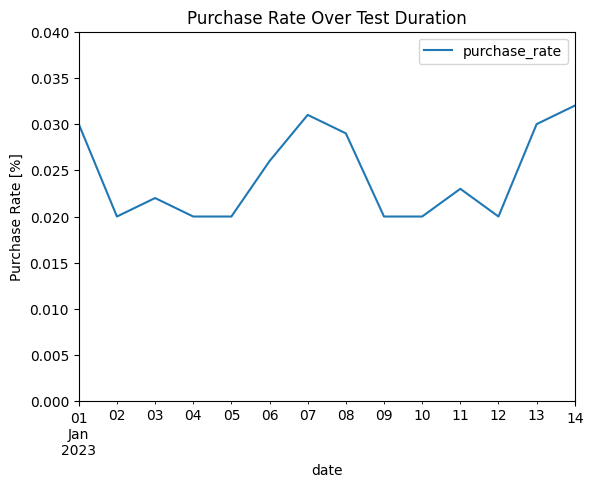

In [118]:
# Adjust the line plot
novelty.plot('date', 'purchase_rate')
plt.title('Purchase Rate Over Test Duration')
plt.ylabel('Purchase Rate [%]')
plt.ylim([0, 0.04])
plt.show()

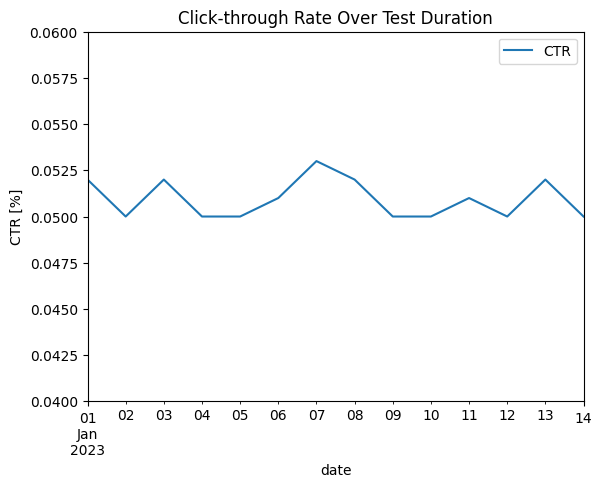

In [119]:
# Adjust the line plot
novelty.plot('date', 'CTR')
plt.title('Click-through Rate Over Test Duration')
plt.ylabel('CTR [%]')
plt.ylim([0.04, 0.06])
plt.show()